# Calibration using Zhang's procedure

In [11]:
from matplotlib import pyplot as plt
import os
import numpy as np
import cv2 # OpenCV
from calibration import Calibrator

## 1. Calibrate using Zhang procedure, i.e., find the intrinsic parameters K and, for each image, the pair of R, t (extrinsic);

In [12]:
calibrator = Calibrator((9,6), 24/1000)

folderpath = './images2'
images_path = [os.path.join(folderpath, imagename) for imagename in os.listdir(folderpath) if imagename.endswith(".jpg")]
images_path.sort()
limages = []

for path in images_path:
    image = cv2.imread(path)
    limages.append(image)

calibrator.fit(limages, radial_distortion=False, iterative=False)
print("K:",calibrator.K)
print("Rotation matrices:")
for i,R in enumerate(calibrator.rotations):
   print(f"R{i+1}:{R}")
print("Translation vectors:")
for i,t in enumerate(calibrator.translations):
    print(f"t{i+1}:{t}")

K: [[ 3.34191762e+03 -3.29188615e-01  1.50919448e+03]
 [ 0.00000000e+00  3.34649140e+03  2.03207726e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Rotation matrices:
R1:[[-0.9598844   0.01137648  0.28016516]
 [ 0.01860926  0.99955834  0.02316946]
 [-0.27977783  0.02745367 -0.95967216]]
R2:[[-0.57404412  0.64783296  0.50078518]
 [ 0.76073125  0.64820297  0.03347952]
 [-0.3029213   0.40018166 -0.86492388]]
R3:[[-0.9729953   0.05385646 -0.22445406]
 [ 0.04830096  0.99837699  0.03017297]
 [ 0.22571478  0.01851681 -0.97401744]]
R4:[[-0.99438381  0.01457612  0.10482541]
 [ 0.01529215  0.99986488  0.00603015]
 [-0.10472335  0.00759929 -0.99447236]]
R5:[[-0.99714896  0.05647763  0.0500422 ]
 [ 0.03878348  0.95247041 -0.30215222]
 [-0.06472855 -0.29934996 -0.95194528]]
R6:[[-0.78694709  0.01782878  0.61676285]
 [ 0.02747622  0.99960346  0.00616221]
 [-0.61640842  0.02179564 -0.7871249 ]]
R7:[[-0.97911603 -0.08042582  0.18671766]
 [ 0.0172082   0.88234267  0.47029277]
 [-0.20257264  0.

## 2. Choose one of the calibration images and compute the total reprojection error for all the grid points (adding a figure with the reprojected points);
We will perform the procedure on the 8-th image, first with the basic procedure then with the iterative one
### Basic procedure

[np.float64(442.5370284929033), np.float64(1666.020365928115), np.float64(1754.321788133731), np.float64(436.93515213842585), np.float64(6867.197255090325), np.float64(25805.038829734767), np.float64(3927.4435153504905), np.float64(848.5501661659346), np.float64(570.1145647643001), np.float64(5061.351995634509), np.float64(3249.942073589451), np.float64(956.0018871389456), np.float64(904.1496731301081), np.float64(4033.997572904393), np.float64(10294.202080421395), np.float64(5456.0205119694265), np.float64(1776.941228222578), np.float64(2016.493443460837), np.float64(748.430183165098), np.float64(549.7456215530146), np.float64(2397.9887895855277), np.float64(2237.6869162645567), np.float64(1013.3204878863587), np.float64(10580.221251113118), np.float64(2609.55112180493), np.float64(2212.643072119945), np.float64(501.26963317622693), np.float64(13413.05669921536)]


Text(0.5, 1.0, 'Total reprojection error: 848.5501661659346')

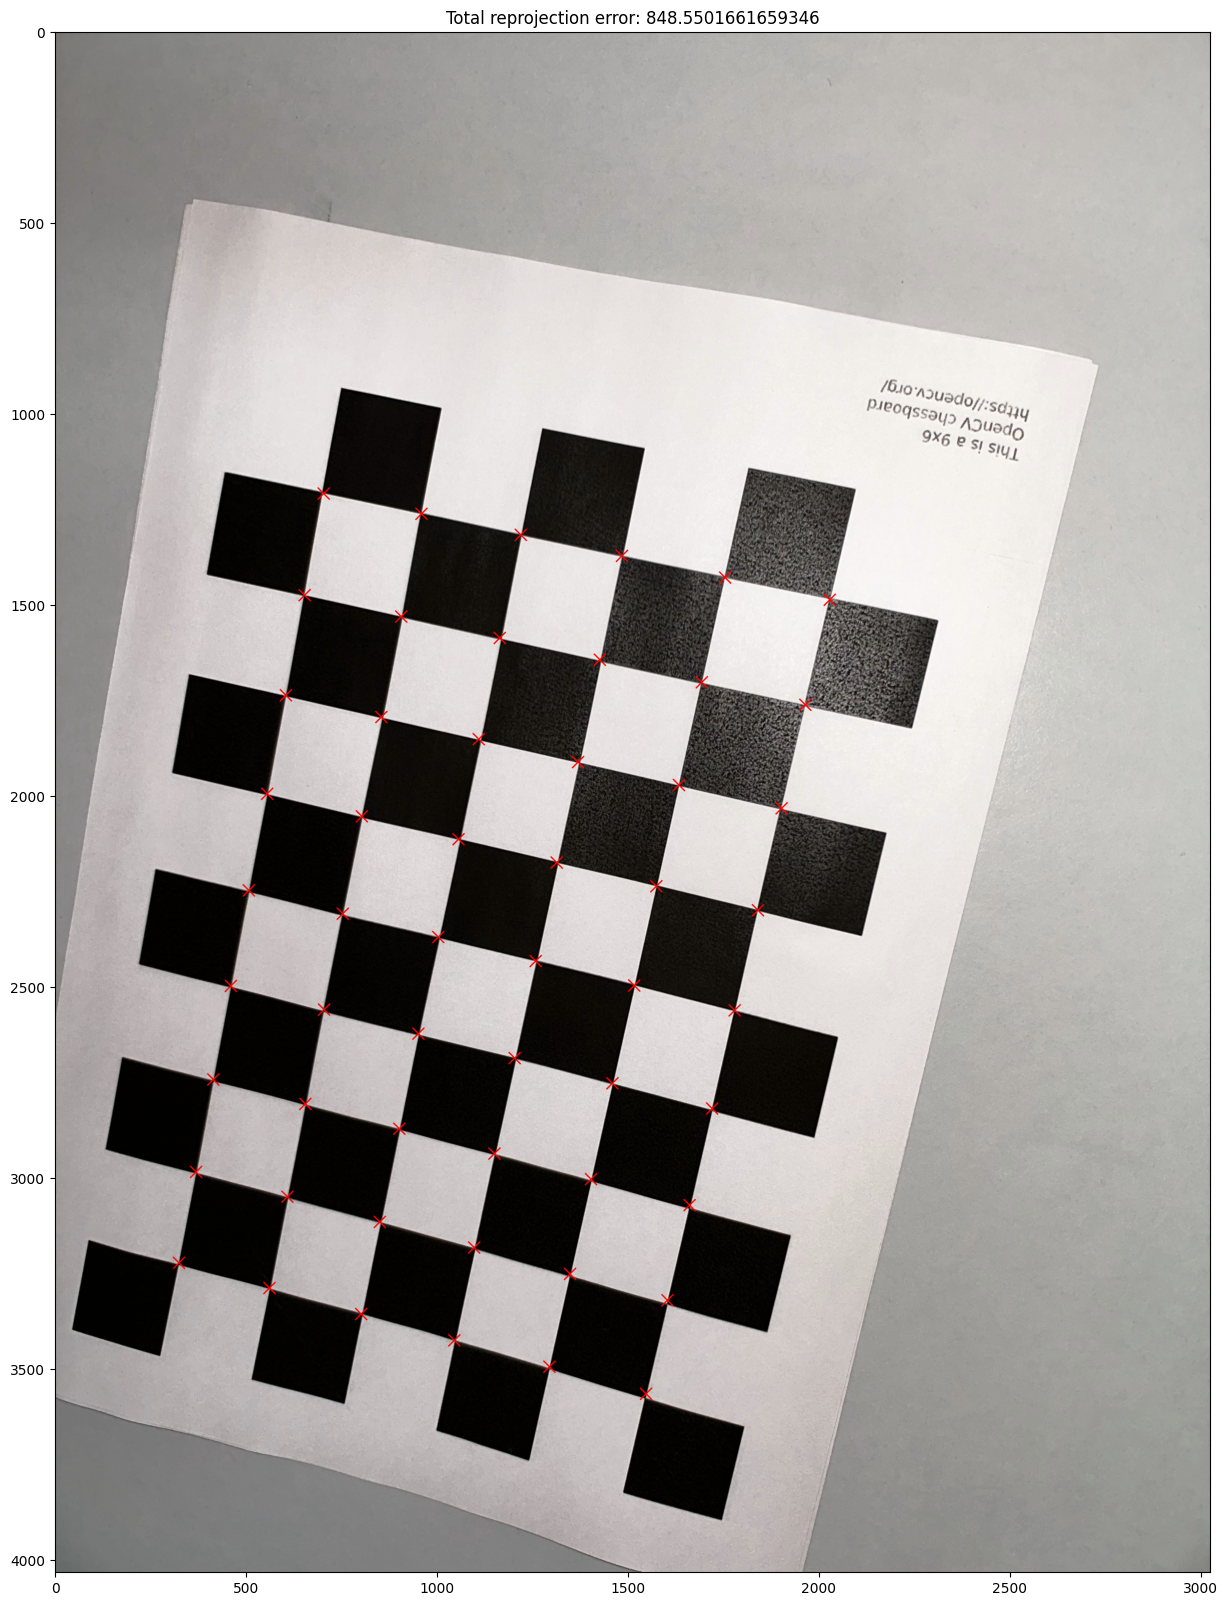

In [13]:
calibrator.fit(limages, radial_distortion=False, iterative=False)
print(calibrator.reprojection_errors)
index = 7
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
image7 = cv2.imread(images_path[index])
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
copy1 = image7.copy()
for point in proj_chess:
    copy1 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(255,0,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=2,
                           markerSize=30
                           )
plt.figure(figsize=(20,20))
plt.imshow(copy1)
plt.title(f"Total reprojection error: {error}")

### Iterative refinement

[np.float64(334.6399430065558), np.float64(563.0735003025114), np.float64(498.8658114063014), np.float64(238.88738825573816), np.float64(426.6174242152379), np.float64(855.6556965048162), np.float64(584.4601929470398), np.float64(597.0803155291235), np.float64(544.7140801889923), np.float64(487.5630626271891), np.float64(588.4388433520472), np.float64(573.8557250026174), np.float64(557.1799184780343), np.float64(611.9951237150394), np.float64(603.4245396295472), np.float64(575.709626615766), np.float64(545.9073054314053), np.float64(412.50579098892945), np.float64(221.95243986131564), np.float64(456.2970851772074), np.float64(272.1161943844381), np.float64(353.84994643221336), np.float64(244.02316520270452), np.float64(495.56561239907984), np.float64(363.7388983794738), np.float64(303.9521561313092), np.float64(175.4361706086886), np.float64(311.77333016715005)]


Text(0.5, 1.0, 'Total reprojection error: 597.0803155291235')

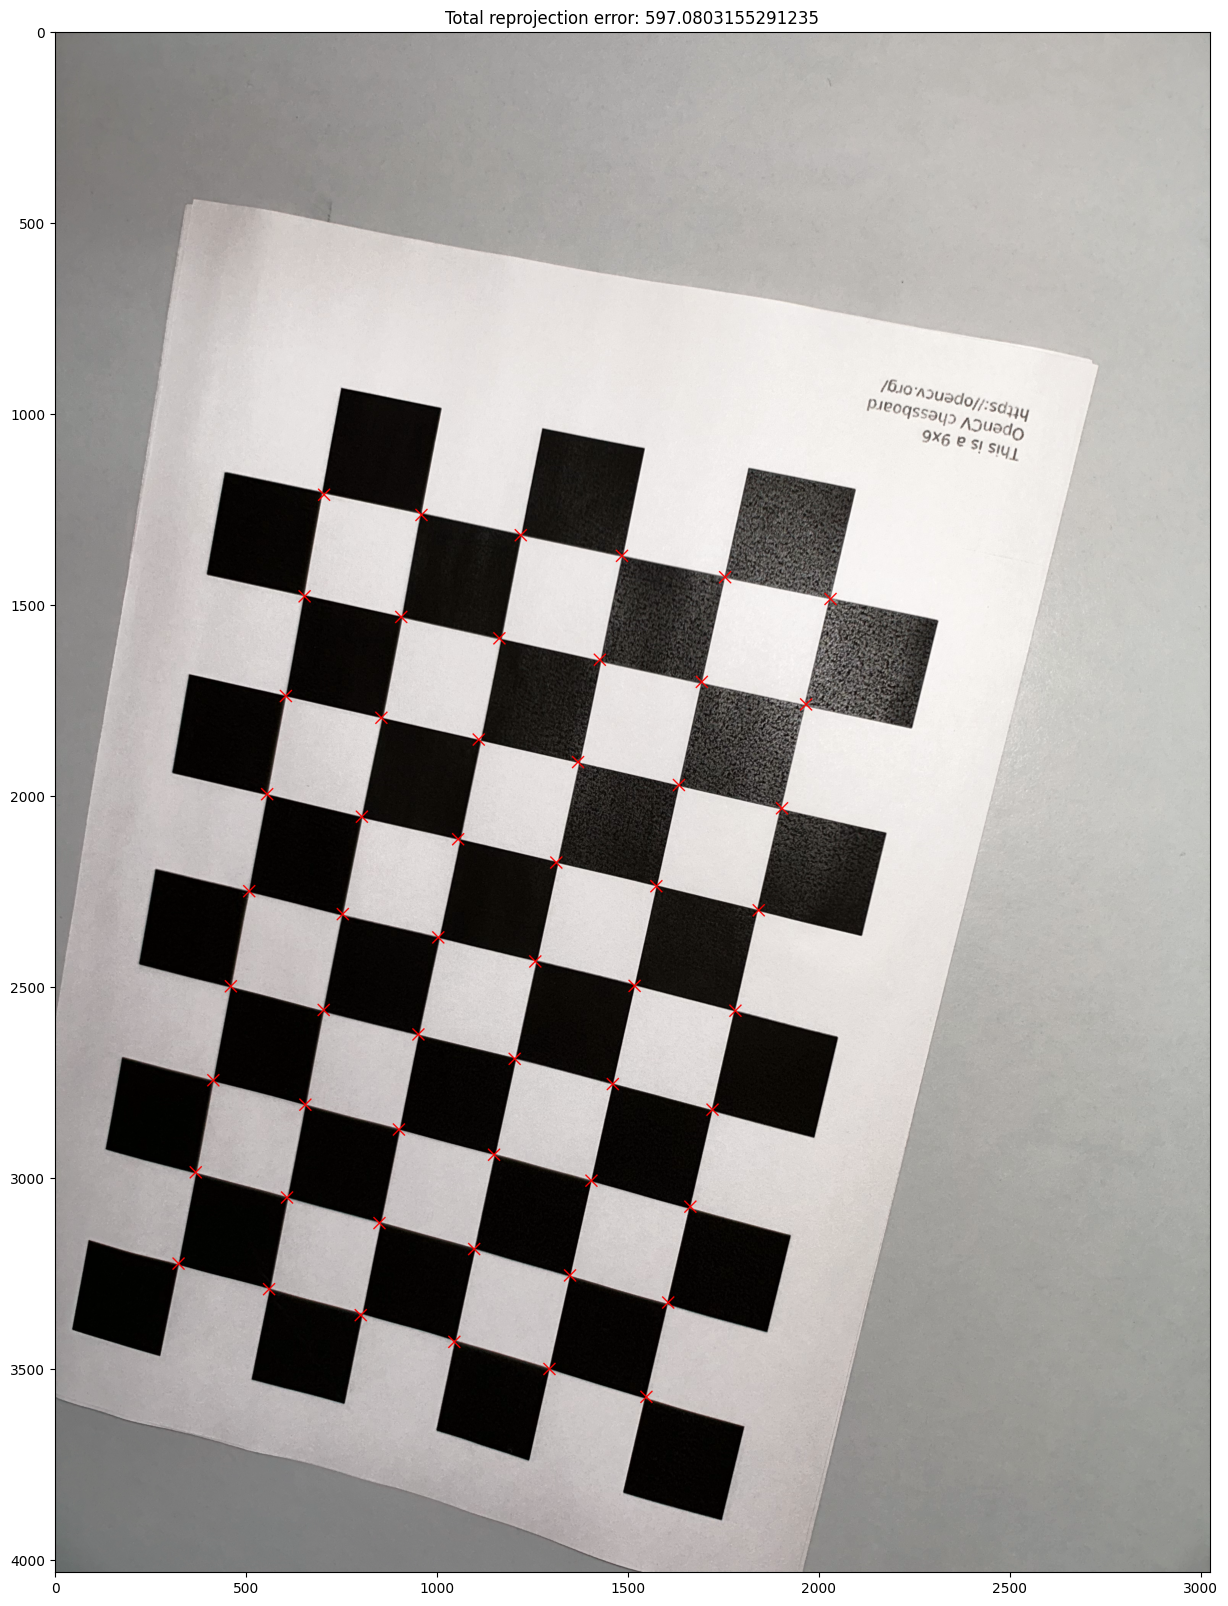

In [14]:
calibrator.fit(limages, radial_distortion=False, iterative=True)
print(calibrator.reprojection_errors)
index = 7
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
image7 = cv2.imread(images_path[index])
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
copy1 = image7.copy()
for point in proj_chess:
    copy1 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(255,0,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=2,
                           markerSize=30
                           )
plt.figure(figsize=(20,20))
plt.imshow(copy1)
plt.title(f"Total reprojection error: {error}")

## 3. Superimpose an object (for instance, a cylinder), to the calibration plane, in all the images employed for the calibration;

In [15]:
# Funzione generata con Microsoft Copilot
def create_image_grid(image_list, grid_size, is_bw=False):
    rows, cols = grid_size
    if len(image_list) != rows * cols:
        raise ValueError("Il numero di immagini non corrisponde alla dimensione della griglia")

    img_height, img_width = image_list[0].shape[:2]

    if not is_bw:
        grid_image = np.zeros((rows * img_height, cols * img_width, 3), dtype=np.uint8)
    else:
        grid_image = np.zeros((rows * img_height, cols * img_width), dtype=np.uint8)

    for idx, img in enumerate(image_list):
        row = idx // cols
        col = idx % cols
        grid_image[row * img_height:(row + 1) * img_height, col * img_width:(col + 1) * img_width] = img

    return grid_image

In [16]:
pts = cv2.ellipse2Poly((96,120), (48,48), 0, 0, 360, 1)
pts = pts/1000
et_low = np.empty_like(pts)
et_high = np.empty_like(et_low)
pts_low = np.hstack((pts, np.zeros((pts.shape[0],1)), np.ones((pts.shape[0],1))))
pts_high = np.hstack((pts, np.full((pts.shape[0],1), 0.120), np.ones((pts.shape[0],1))))

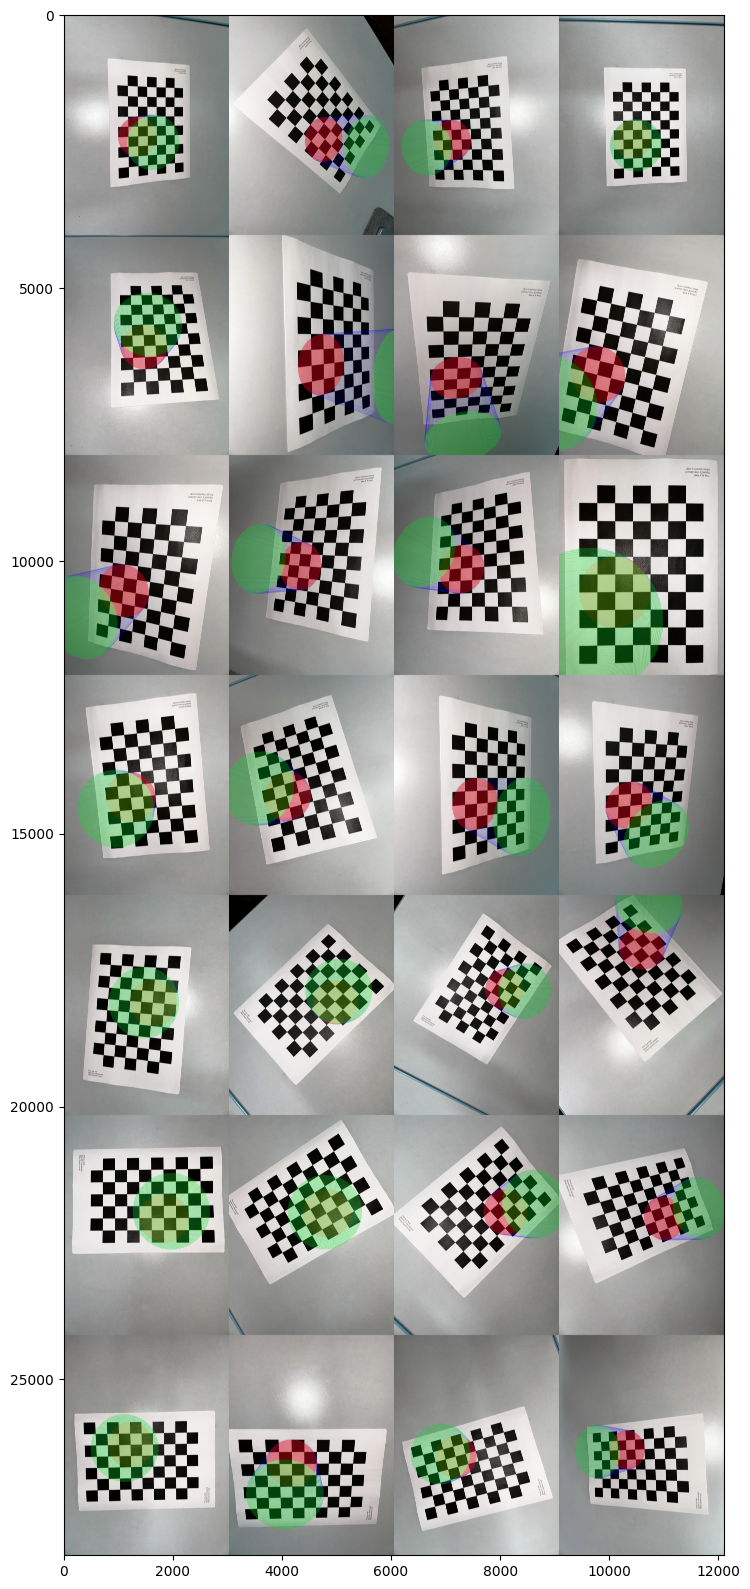

In [17]:
image_list = []
for i,path in enumerate(images_path):
    original = cv2.imread(path)
    P = calibrator.projection_matrices[i]

    proj_low = np.transpose(P @ pts_low.T)
    et_low[:,0] = proj_low[:,0]/proj_low[:,2]
    et_low[:,1] = proj_low[:,1]/proj_low[:,2]

    proj_high = np.transpose(P @ pts_high.T)
    et_high[:,0] = proj_high[:,0]/proj_high[:,2]
    et_high[:,1] = proj_high[:,1]/proj_high[:,2]

    img2 = original.copy()
    img2 = cv2.fillConvexPoly(img2,np.array(et_low, dtype=np.int32),(255,0,0))
    img3 = cv2.fillConvexPoly(img2.copy(),np.array(et_high, dtype=np.int32),(0,255,0))
    img4 = original.copy()
    for i in range(et_low.shape[0]):
        img4 = cv2.line(img4, tuple(np.array(et_low[i], dtype=np.int32)), tuple(np.array(et_high[i], dtype=np.int32)),(0,0,255))
    img2 = cv2.addWeighted(img2, 0.5, original, 0.5, 0)
    img3 = cv2.addWeighted(img2, 0.5, img3, 0.5, 0)
    img4 = cv2.addWeighted(img3, 0.5, img4, 0.5, 0)
    image_list.append(img4)

compound = create_image_grid(image_list, (7,4))
plt.figure(figsize=(20,20))
plt.imshow(compound)

[np.float64(122.61106821618836), np.float64(296.2734618174416), np.float64(163.8581296218514), np.float64(41.27959165664579), np.float64(186.3459689475772), np.float64(478.96166125181117), np.float64(337.1677032974111), np.float64(401.7193240724348), np.float64(327.86841228721045), np.float64(379.3332730191268), np.float64(226.20066950141128), np.float64(286.87433768725504), np.float64(60.24462092377537), np.float64(204.5333132943689), np.float64(204.44583054744328), np.float64(231.80703450631825), np.float64(75.78495000958313), np.float64(71.885299826674), np.float64(66.94041226262958), np.float64(363.1480412402979), np.float64(101.44016458737157), np.float64(59.84633449804319), np.float64(118.61874935859517), np.float64(141.98757556823261), np.float64(98.07704263712105), np.float64(125.50886269633838), np.float64(137.74654369879454), np.float64(197.39651998139047)]
[[ 57  52  53 ... 246 245 245]
 [ 56  53  54 ... 244 243 243]
 [ 48  51  54 ... 244 242 240]
 ...
 [238 240 242 ... 235 

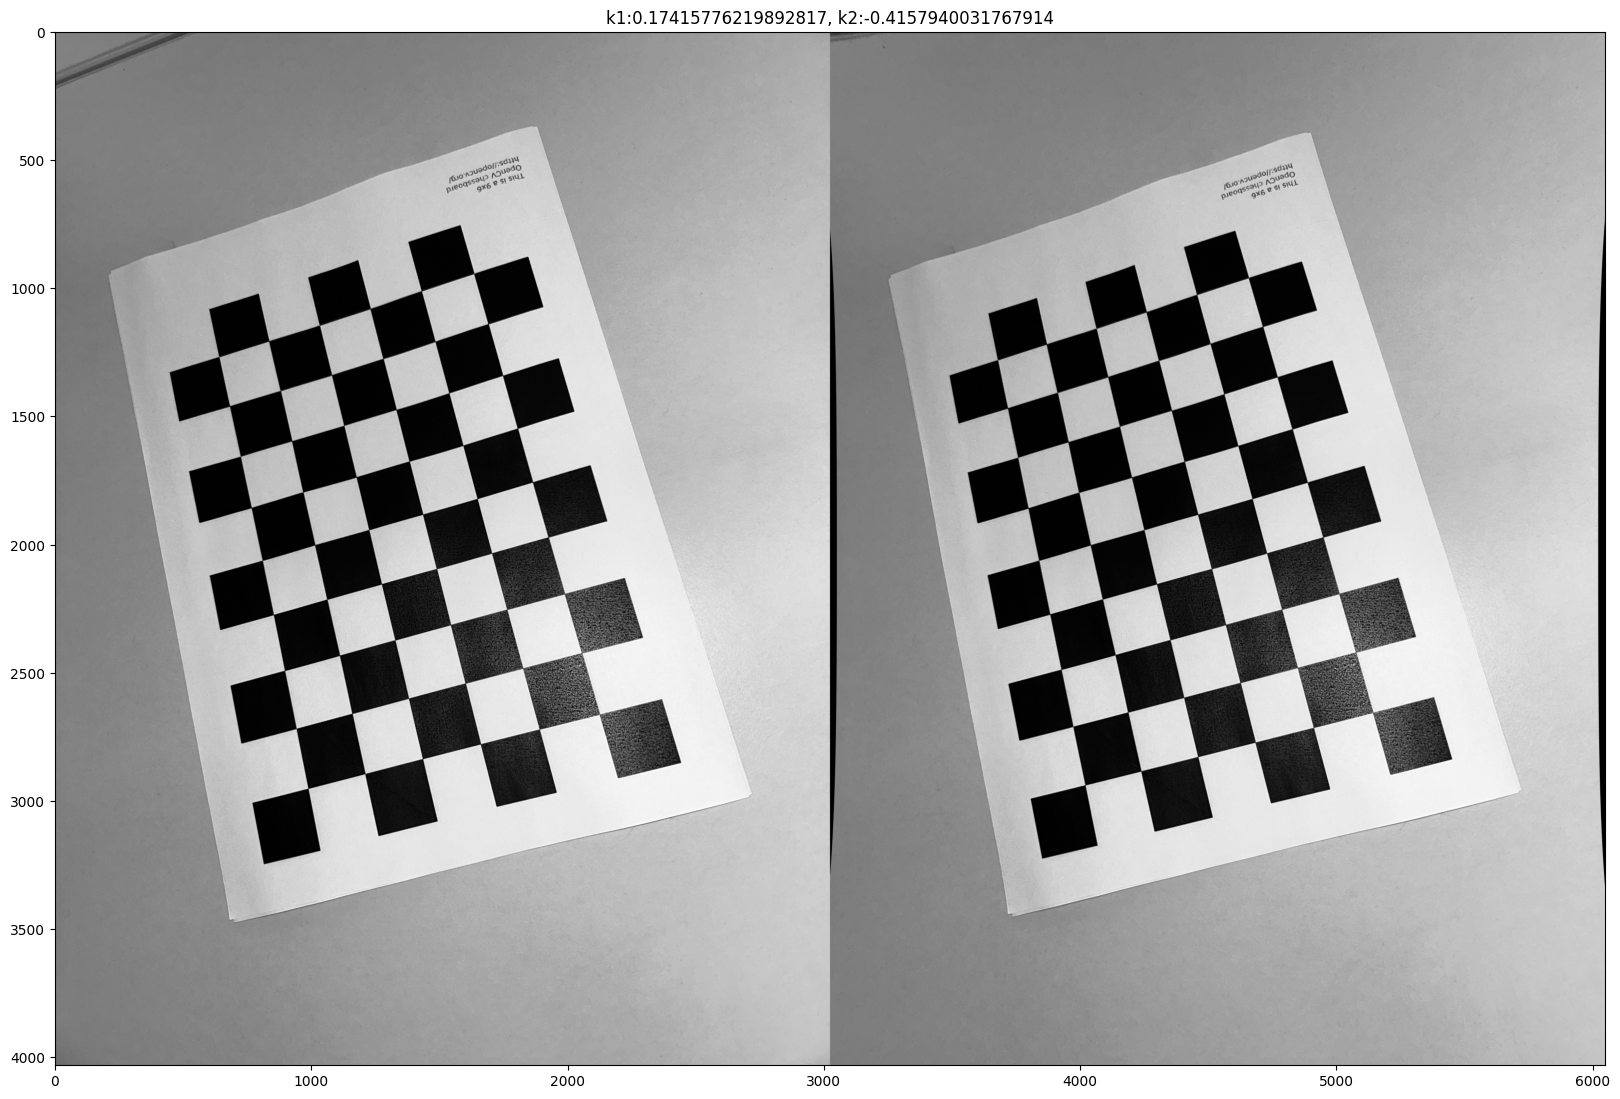

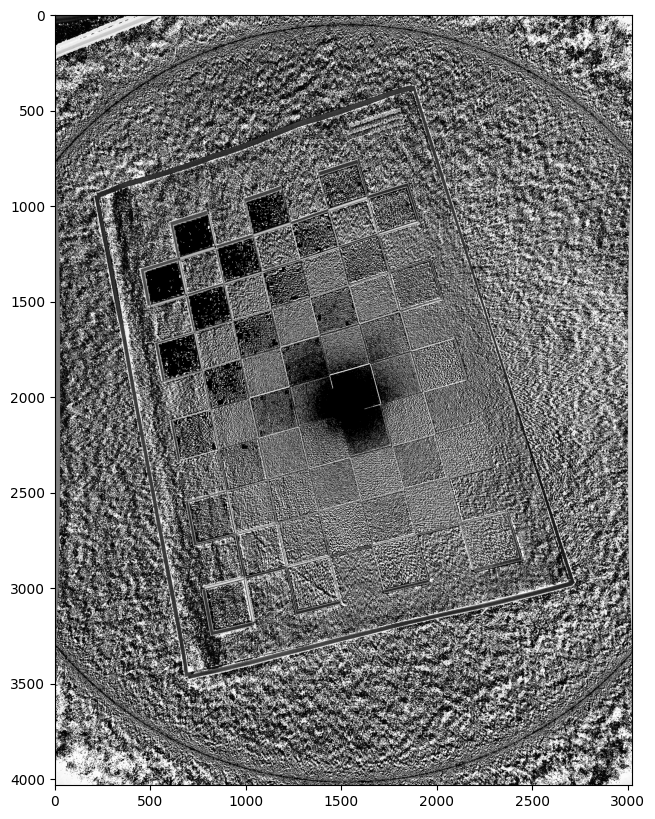

In [18]:
calibrator.fit(limages, radial_distortion=True, iterative=True)
print(calibrator.reprojection_errors)
index = 13
image7 = cv2.imread(images_path[index])
image7 = cv2.cvtColor(image7.copy(), cv2.COLOR_BGR2GRAY)
undistorted7 = calibrator.compensate_radial_distortion(image7)
limage1 = [image7, undistorted7]
compound = create_image_grid(limage1, (1,2), True)
diff = image7 - undistorted7
print(diff, np.min(diff), np.max(diff))
plt.figure(figsize=(20,20))
plt.imshow(compound, cmap='gray')
plt.title(f"k1:{calibrator.distortion_parameters[0]}, k2:{calibrator.distortion_parameters[1]}")

plt.figure(figsize=(10,10))
plt.imshow(diff, cmap='gray')